<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/QuantumHeatEngine1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


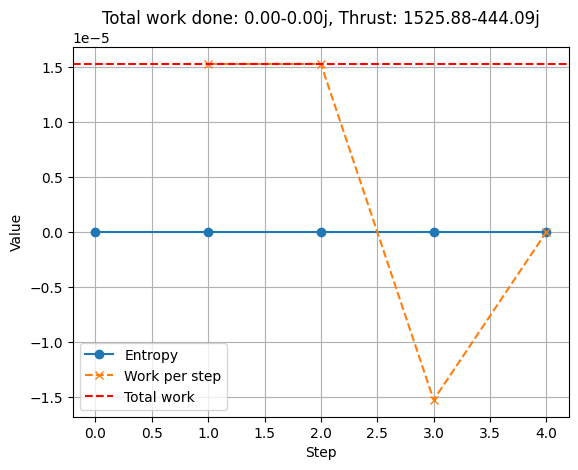

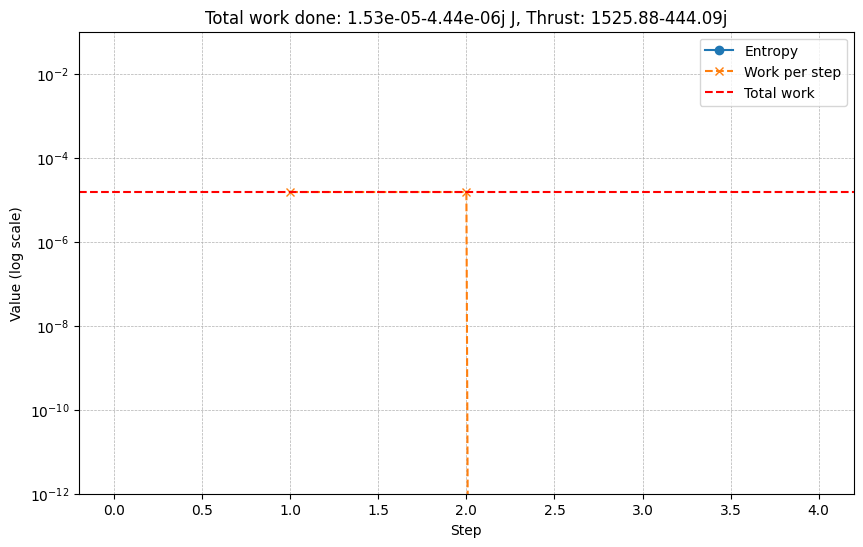

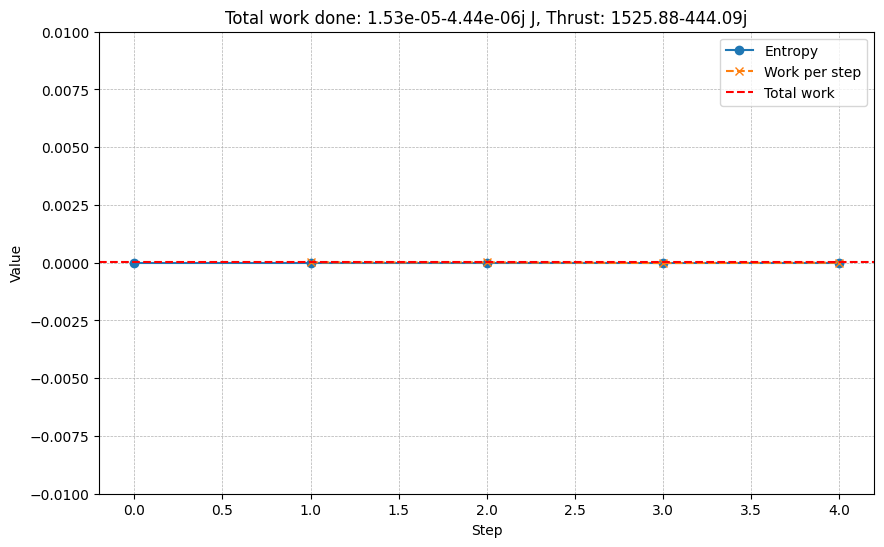

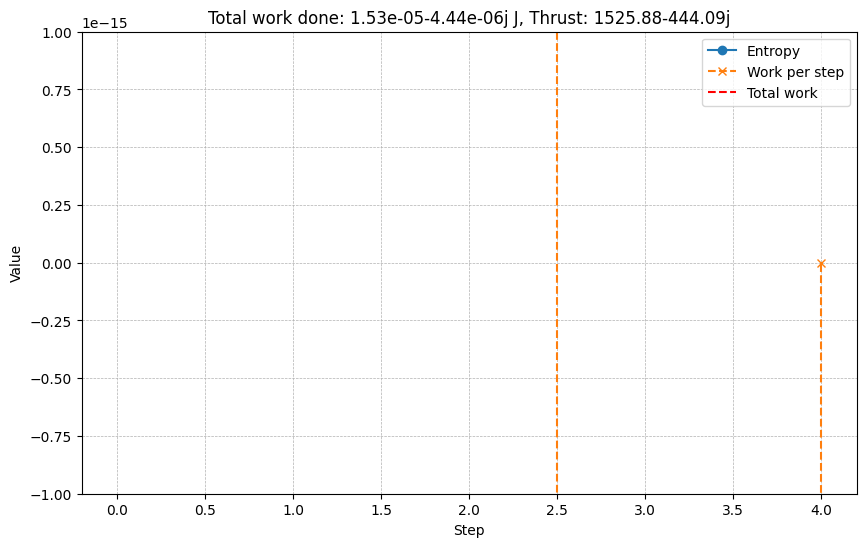

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1477: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))


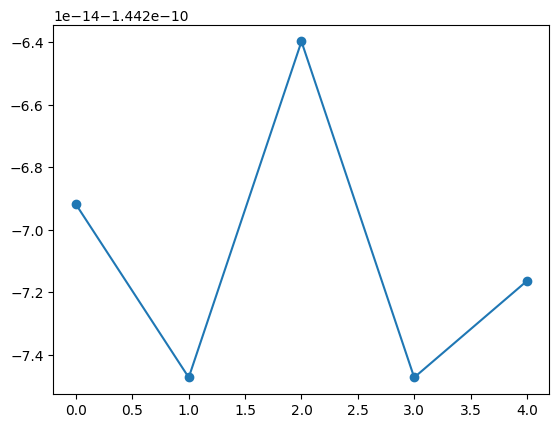

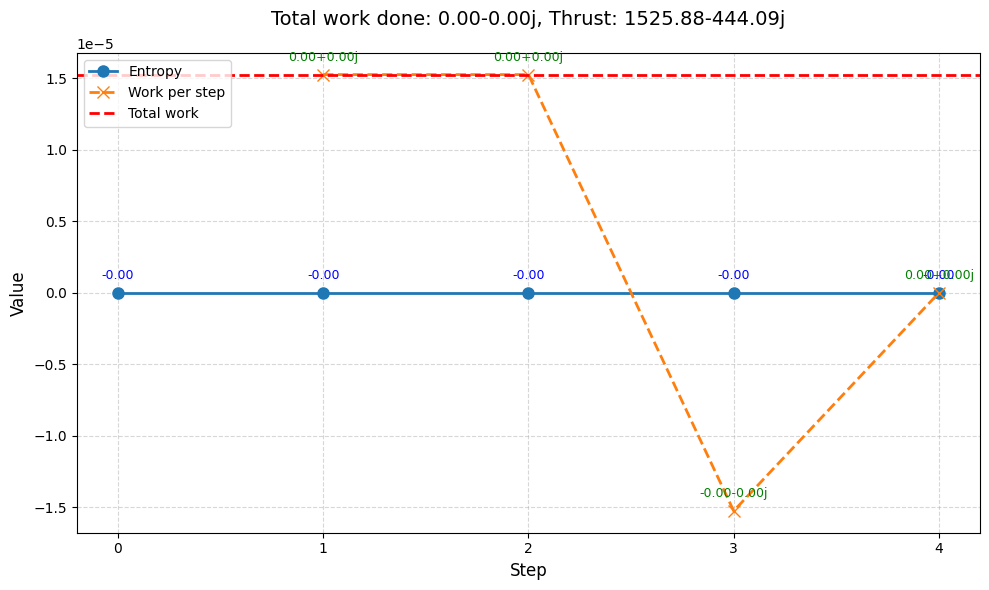

ValueError: ignored

<Figure size 1000x600 with 1 Axes>

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Parameters setup
#omega_i_values = [1, 2, 1.5, 3]  # Example values for omega_i for each step
omega_i_values = [1.50e11, 1.55e11, 1.60e11, 1.65e11]  # Example values for omega_i for each step in rad/s

#tau_values = [1, 1, 1, 1]  # Example values for tau_i for each step
tau_values = [1e-9, 2e-9, 3e-9, 4e-9]  # Example values for tau_i for each step in seconds (e.g., considering ns pulses)

# Define initial density matrix and Hamiltonians
psi = np.array([1/np.sqrt(2), 1/np.sqrt(2)])  # Example initial state
rho_0 = np.outer(psi, np.conj(psi))

H_i = [omega * np.array([[0, 0], [0, 1]]) for omega in omega_i_values]  # Hamiltonians

# Functions to calculate different quantities
def unitary(H, tau):
    """Calculate the unitary operator given Hamiltonian and tau."""
    return la.expm(-1j * H * tau)

def rho_after_unitary(U, rho):
    """Calculate the density matrix after applying unitary operation."""
    return U @ rho @ np.conj(U).T

def entropy(rho):
    """Calculate von Neumann entropy."""
    eigenvalues = la.eigvalsh(rho)
    return -np.sum(eigenvalues * np.log2(eigenvalues + 1e-10))

def work(rho_i, rho_f, H):
    """Calculate work done."""
    return np.trace(rho_f @ H) - np.trace(rho_i @ H)

# Simulate cycle
rho = [rho_0]
entropies = [entropy(rho_0)]
works = []

for i in range(4):
    U = unitary(H_i[i], tau_values[i])
    rho.append(rho_after_unitary(U, rho[-1]))
    entropies.append(entropy(rho[-1]))
    works.append(work(rho[i], rho[i+1], H_i[i]))

# Calculate total work and thrust
W_total = np.sum(works)
T_cycle = np.sum(tau_values)
thrust = W_total / T_cycle

# Visualization
plt.plot(range(5), entropies, marker='o', label='Entropy')
plt.plot(range(1, 5), works, marker='x', linestyle='--', label='Work per step')
plt.axhline(y=W_total, color='r', linestyle='--', label='Total work')
plt.xlabel('Step')
plt.ylabel('Value')
plt.title(f'Total work done: {W_total:.2f}, Thrust: {thrust:.2f}')
plt.legend()
plt.grid(True)
plt.show()

########################

import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

#... (rest of your code remains unchanged)

# Visualization
plt.figure(figsize=(10, 6))  # Make the figure larger for better visualization

plt.plot(range(5), entropies, marker='o', label='Entropy')
plt.plot(range(1, 5), works, marker='x', linestyle='--', label='Work per step')
plt.axhline(y=W_total, color='r', linestyle='--', label='Total work')

# If works are small and you want to focus on that:
plt.yscale('log')  # Use log scale for y-axis
plt.ylim([1e-12, 1e-1])  # Adjust y-axis limits to zoom around 1.0e-10 J

plt.xlabel('Step')
plt.ylabel('Value (log scale)')
plt.title(f'Total work done: {W_total:.2e} J, Thrust: {thrust:.2f}')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)  # Adding grid for both major and minor ticks
plt.show()

# Visualization
plt.figure(figsize=(10, 6))

plt.plot(range(5), entropies, marker='o', label='Entropy')
plt.plot(range(1, 5), works, marker='x', linestyle='--', label='Work per step')
plt.axhline(y=W_total, color='r', linestyle='--', label='Total work')

# If works are very small, and you still want to use log-scale:
# plt.yscale('log')
# plt.ylim([1e-12, 1e-1])

# For non-log scale with small values
plt.ylabel('Value')
plt.ylim([-1e-2, 1e-2])  # Adjust according to your value range

plt.xlabel('Step')
plt.title(f'Total work done: {W_total:.2e} J, Thrust: {thrust:.2f}')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# Visualization
plt.figure(figsize=(10, 6))

plt.plot(range(5), entropies, marker='o', label='Entropy')
plt.plot(range(1, 5), works, marker='x', linestyle='--', label='Work per step')
plt.axhline(y=W_total, color='r', linestyle='--', label='Total work')

# Adjust the y-axis limits to zoom into the region of interest
plt.ylim([-1e-15, 1e-15])  # Focused around -4.4e-16

plt.xlabel('Step')
plt.ylabel('Value')
plt.title(f'Total work done: {W_total:.2e} J, Thrust: {thrust:.2f}')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

# print(len(entropies))  # Should print 5 if everything is in order.

plt.plot(range(len(entropies)), entropies, marker='o', label='Entropy')

import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(10,6))  # setting the figure size
plt.plot(range(len(entropies)), entropies, marker='o', label='Entropy', linewidth=2, markersize=8)

# Adding annotations
for i, val in enumerate(entropies):
    plt.annotate(f"{val:.2f}", (i, val), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='blue')

# Checking if works have been calculated and adding them to the plot
if works:
    plt.plot(range(1, len(works) + 1), works, marker='x', linestyle='--', label='Work per step', linewidth=2, markersize=8)
    for i, val in enumerate(works):
        plt.annotate(f"{val:.2f}", (i+1, val), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='green')

# Adding more details to the plot
plt.axhline(y=W_total, color='r', linestyle='--', label='Total work', linewidth=2)
plt.xlabel('Step', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title(f'Total work done: {W_total:.2f}, Thrust: {thrust:.2f}', fontsize=14, pad=20)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(len(entropies)))  # to ensure we have integer ticks on the x-axis
plt.tight_layout()  # adjusts subplot params so that subplot(s) fits in to the figure area

# Displaying the plot
plt.show()

########

import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(10,6))  # setting the figure size
plt.plot(range(len(entropies)), entropies, marker='o', label='Entropy', linewidth=2, markersize=8, color='navy')

# Adding annotations
for i, val in enumerate(entropies):
    plt.annotate(f"{val:.2f}", (i, val), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='navy')

# Adding more details to the plot
plt.xlabel('Step', fontsize=12)
plt.ylabel('Entropy', fontsize=12)
plt.title('Evolution of Entropy Across Different Steps', fontsize=14, pad=20)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(len(entropies)))  # to ensure we have integer ticks on the x-axis
plt.tight_layout()  # adjusts subplot params so that subplot(s) fits in to the figure area

# Add some text description or insight
plt.text(0, min(entropies)-0.2, "Note: Points indicate entropy at each step.", fontsize=10, color='red')

# Highlight a specific point if required
highlight = [2]  # Step 2 for example
plt.scatter(highlight, [entropies[i] for i in highlight], color='red', zorder=5)
plt.annotate("Critical Step", (highlight[0], entropies[highlight[0]]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red', zorder=5)

# Displaying the plot
plt.show()

#########################

def plot_quantities(entropies, works, W_total, thrust, y_scale=None, y_lim=None):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(entropies)), entropies, marker='o', label='Entropy')
    plt.plot(range(1, len(works) + 1), works, marker='x', linestyle='--', label='Work per step')
    plt.axhline(y=W_total, color='r', linestyle='--', label='Total work')

    plt.xlabel('Step')
    plt.ylabel('Value')
    plt.title(f'Total work done: {W_total:.2e} J, Thrust: {thrust:.2f}')
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.5)

    if y_scale:
        plt.yscale(y_scale)
    if y_lim:
        plt.ylim(y_lim)

    plt.show()

